**Imports**

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
import warnings


In [2]:
with warnings.catch_warnings():
 warnings.filterwarnings("ignore")

**Read-In Data**

In [3]:
test_set_features = pd.read_csv(r'C:\Users\Isabe\Oxygen Exposure of Southern California Megafauna\test_set_features.csv')
training_set_features = pd.read_csv(r'C:\Users\Isabe\Oxygen Exposure of Southern California Megafauna\training_set_features.csv')
training_set_labels = pd.read_csv(r'C:\Users\Isabe\Oxygen Exposure of Southern California Megafauna\training_set_labels.csv')

In [4]:
test_set_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

**Merge Training Profile with Vaccine Outcome and Explore Data**

In [5]:
training_data = pd.merge(training_set_labels, training_set_features, on="respondent_id")

In [6]:
training_data.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern',
       'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [7]:
training_data.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,0.212454,0.465608,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.409052,0.498825,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


<AxesSubplot:ylabel='h1n1_concern'>

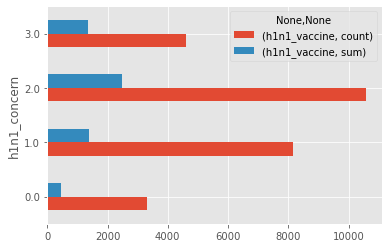

In [8]:
training_data.groupby(['h1n1_concern']).agg({'h1n1_vaccine': ['count','sum']}).plot.barh(legend = True)
#   ? does this make sense?

In [9]:
training_data.groupby(['h1n1_concern','income_poverty']).agg({'h1n1_vaccine': ['mean']})

h1n1_vaccine
                                               mean
h1n1_concern income_poverty                        
0.0          <= $75,000, Above Poverty     0.121951
             > $75,000                     0.180617
             Below Poverty                 0.126404
1.0          <= $75,000, Above Poverty     0.156666
             > $75,000                     0.206022
             Below Poverty                 0.171429
2.0          <= $75,000, Above Poverty     0.226030
             > $75,000                     0.278969
             Below Poverty                 0.178947
3.0          <= $75,000, Above Poverty     0.300346
             > $75,000                     0.353808
             Below Poverty                 0.244048

<AxesSubplot:title={'center':'Vaccine Rates Among Groups of Poverty and Concern'}, ylabel='h1n1_concern,income_poverty'>

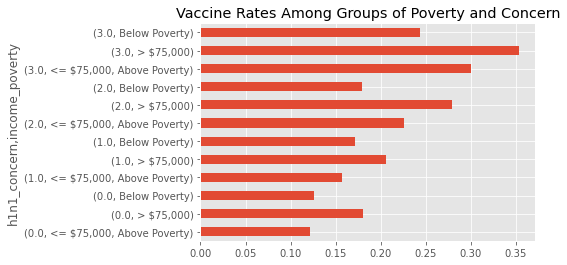

In [10]:
training_data.groupby(['h1n1_concern','income_poverty']).agg({'h1n1_vaccine': ['mean']}).plot.barh(legend =None, title = 'Vaccine Rates Among Groups of Poverty and Concern')

In [11]:
#rate.reindex(index = ([1.0, 2.0, 3.0, 4.0],['Below Poverty','<= $75,000, Above Poverty','> $75,000']))

<AxesSubplot:title={'center':'Vaccine Rates Among Groups of Poverty and Knowledge'}, ylabel='h1n1_knowledge,income_poverty'>

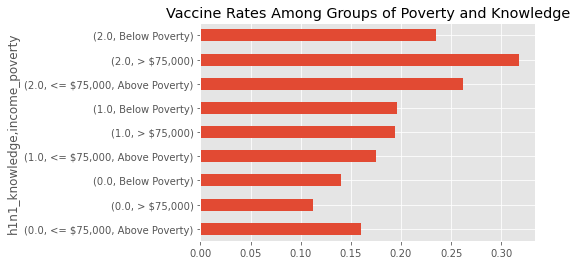

In [12]:
training_data.groupby(['h1n1_knowledge','income_poverty']).agg({'h1n1_vaccine': ['mean']}).plot.barh(legend =None, title = 'Vaccine Rates Among Groups of Poverty and Knowledge')

<AxesSubplot:title={'center':'Vaccine Rates Among Groups of Avoidance and Belief of Effectiveness'}, ylabel='behavioral_avoidance,opinion_seas_vacc_effective'>

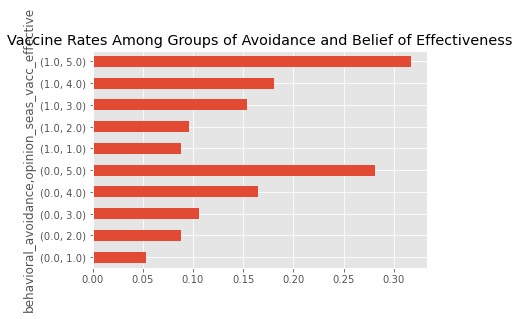

In [13]:
training_data.groupby(['behavioral_avoidance','opinion_seas_vacc_effective']).agg({'h1n1_vaccine': ['mean']}).plot.barh(legend =None, title = 'Vaccine Rates Among Groups of Avoidance and Belief of Effectiveness')

In [14]:
regressor_adjusted = training_data

**Numerical Ranking of Categorical Variables**

In [15]:
regressor_adjusted['age_group'] = regressor_adjusted['age_group'].replace('18 - 34 Years',1).replace('35 - 44 Years',2)\
                                 .replace('45 - 54 Years',3).replace('55 - 64 Years',4).replace('65+ Years',5)
regressor_adjusted['education'] = regressor_adjusted['education'].replace('< 12 Years',1).replace('12 Years',2)\
                                  .replace('College Graduate',4).replace('Some College',3)
regressor_adjusted['sex'] = regressor_adjusted['sex'].replace('Male',0).replace('Female',1)
regressor_adjusted['income_poverty'] = regressor_adjusted['income_poverty'].replace('Below Poverty',1).replace\
                                        ('<= $75,000, Above Poverty',2).replace('> $75,000',3)
regressor_adjusted['marital_status'] = regressor_adjusted['marital_status'].replace('Not Married',0).replace('Married',1)
regressor_adjusted['employment_status'] = regressor_adjusted['employment_status'].replace('Not in Labor Force',0).\
                                           replace('Unemployed',1).replace('Employed',2)
regressor_adjusted['census_msa'] = regressor_adjusted['census_msa'].replace('Non-MSA',0).replace('MSA, Not Principle  City'\
                                   ,1).replace('MSA, Principle City',2)
regressor_adjusted['rent_or_own'] = regressor_adjusted['rent_or_own'].replace('Rent',0).replace('Own',1)

**One Hot Encoding for Non-Rankable Categorical Variables**

In [16]:
OneHotEncoder(
    categories = 'auto',
    drop = None,
    sparse = True,
    dtype = 'numpy.float64',
    handle_unknown = 'error'
)

ohe = OneHotEncoder()

In [17]:
def OneHotEncoding(df_name, ColName):
    encoded_col = ohe.fit_transform(df_name[[ColName]]).toarray()
    encoded_col_titles = ohe.categories_[0]
    df_name[encoded_col_titles] = encoded_col
    #df_name = df_name.drop([ColName], axis = 1)

In [18]:
OneHotEncoding(regressor_adjusted, 'employment_industry')
OneHotEncoding(regressor_adjusted, 'race')
OneHotEncoding(regressor_adjusted, 'hhs_geo_region')
OneHotEncoding(regressor_adjusted, 'employment_occupation')

In [19]:
regressor_adjusted = regressor_adjusted.drop(['employment_industry'], axis = 1)
regressor_adjusted = regressor_adjusted.drop(['race'], axis = 1)
regressor_adjusted = regressor_adjusted.drop(['hhs_geo_region'], axis = 1)
regressor_adjusted = regressor_adjusted.drop(['employment_occupation'], axis = 1)

In [20]:
#regressor_adjusted = regressor_adjusted.drop(['health_insurance'], axis=1)

**Dealing with Null Values**

In [21]:
def ReplaceNullWithMean(DataFrame,x):
    i=0
    while (i<len(x)):
        DataFrame[x[i]] = DataFrame[x[i]].replace(np.NaN, DataFrame[x[i]].mean())
        i= i+1

In [22]:
regressor_adjusted.isnull().sum()

respondent_id         0
h1n1_vaccine          0
seasonal_vaccine      0
h1n1_concern         92
h1n1_knowledge      116
                   ... 
vlluhbov              0
xgwztkwe              0
xqwwgdyp              0
xtkaffoo              0
xzmlyyjv              0
Length: 93, dtype: int64

In [23]:
null1 = regressor_adjusted[regressor_adjusted.columns[regressor_adjusted.isnull().any()]]

In [24]:
null1.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'education',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'household_adults', 'household_children'],
      dtype='object')

In [25]:
ReplaceNullWithMean(regressor_adjusted,null1.columns)

In [26]:
null1 = regressor_adjusted[regressor_adjusted.columns[regressor_adjusted.isnull().any()]]

In [27]:
null1.columns

Index([], dtype='object')

In [28]:
regressor_adjusted.shape

(26707, 93)

In [29]:
just_features_adjusted = regressor_adjusted.drop(['h1n1_vaccine'], axis = 1).drop(['seasonal_vaccine'], axis = 1).drop(['respondent_id'], axis = 1)

In [30]:
regressor_adjusted.groupby(['h1n1_concern','income_poverty']).agg({'h1n1_vaccine': ['mean']})

h1n1_vaccine
                                    mean
h1n1_concern income_poverty             
0.000000     1.000000           0.126404
             2.000000           0.121951
             2.184572           0.126961
             3.000000           0.180617
1.000000     1.000000           0.171429
             2.000000           0.156666
             2.184572           0.153086
             3.000000           0.206022
1.618486     1.000000           0.312500
             2.000000           0.190476
             2.184572           0.137255
             3.000000           0.000000
2.000000     1.000000           0.178947
             2.000000           0.226030
             2.184572           0.203247
             3.000000           0.278969
3.000000     1.000000           0.244048
             2.000000           0.300346
             2.184572           0.263100
             3.000000           0.353808

**Regressor Creation**

In [31]:
"""
def auto_regressor(test_col, df, regressor_name):
    y = df.loc[:,test_col]
    X = df.drop(['h1n1_vaccine'], axis = 1).drop(['seasonal_vaccine'], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    regressor_name = RandomForestRegressor(n_estimators = 20, random_state = 0)
    regressor_name.fit(X_train, y_train)
    y_pred = regressor_name.predict(X_test)
    print('===============================================================================')
    print(test_col)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('===============================================================================')
    """

"\ndef auto_regressor(test_col, df, regressor_name):\n    y = df.loc[:,test_col]\n    X = df.drop(['h1n1_vaccine'], axis = 1).drop(['seasonal_vaccine'], axis = 1)\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)\n    regressor_name = RandomForestRegressor(n_estimators = 20, random_state = 0)\n    regressor_name.fit(X_train, y_train)\n    y_pred = regressor_name.predict(X_test)\n    print('===============================================================================')\n    print(test_col)\n    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))\n    print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))\n    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))\n    print('===============================================================================')\n    "

In [32]:
seasonal_y = regressor_adjusted.loc[:,'seasonal_vaccine']
seasonal_X = regressor_adjusted.drop(['h1n1_vaccine'], axis = 1).drop(['seasonal_vaccine'], axis = 1).drop(['respondent_id'],axis=1)
seasonal_X_train, seasonal_X_test, seasonal_y_train, seasonal_y_test = train_test_split(seasonal_X, seasonal_y, test_size = .15)
seasonal_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 100)
seasonal_regressor.fit(seasonal_X_train, seasonal_y_train)
seasonal_y_pred = seasonal_regressor.predict(seasonal_X_test)

C:\Users\Isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [33]:
h1n1_y = regressor_adjusted.loc[:,'h1n1_vaccine']
h1n1_X = regressor_adjusted.drop(['h1n1_vaccine'], axis = 1).drop(['seasonal_vaccine'], axis = 1).drop(['respondent_id'],axis=1)
h1n1_X_train, h1n1_X_test, h1n1_y_train, h1n1_y_test = train_test_split(h1n1_X, h1n1_y, test_size = 0.15)
h1n1_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 100)
h1n1_regressor.fit(h1n1_X_train, h1n1_y_train)
h1n1_y_pred = h1n1_regressor.predict(h1n1_X_test)

C:\Users\Isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [34]:
print('H1N1 Mean Absolute Error:', metrics.mean_absolute_error(h1n1_y_test,h1n1_y_pred))
print('H1N1 Mean Squared Error:', metrics.mean_squared_error(h1n1_y_test,h1n1_y_pred))
print('H1N1 Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(h1n1_y_test,h1n1_y_pred)))
print('===============================================================================')
print('Seasonal Mean Absolute Error:', metrics.mean_absolute_error(seasonal_y_test,seasonal_y_pred))
print('Seasonal Mean Squared Error:', metrics.mean_squared_error(seasonal_y_test,seasonal_y_pred))
print('Seasonal Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(seasonal_y_test,seasonal_y_pred)))

H1N1 Mean Absolute Error: 0.2168644871474919
H1N1 Mean Squared Error: 0.10462918093336661
H1N1 Root Mean Squared Error: 0.3234643425995617
Seasonal Mean Absolute Error: 0.31371724482156227
Seasonal Mean Squared Error: 0.15838696556026952
Seasonal Root Mean Squared Error: 0.39797859937472707


***Importance***

In [35]:
def ImportancesGraph(RegressorName):
    importances = list(RegressorName.feature_importances_)
    feature_importances = [(regressor_adjusted, round(importance, 2)) for feature, importance in zip(regressor_adjusted.columns, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    #print('Variable: {:20} Importance: {}'.format(feature_importances)
    #[print('Variable: {:20} Importance: {}'.format(feature_importances, importances)) for pair in feature_importances]
    x_values = list(range(len(importances)))
    plt.rcParams["figure.figsize"] = (18,6)
    plt.xticks(x_values, just_features_adjusted.columns, rotation='vertical')
    plt.ylabel('Importance'); 
    plt.xlabel('Variables'); 
    plt.title('Variable Importances');
    plt.bar(x_values, importances, color = 'r', edgecolor = 'k', linewidth = 1.8)

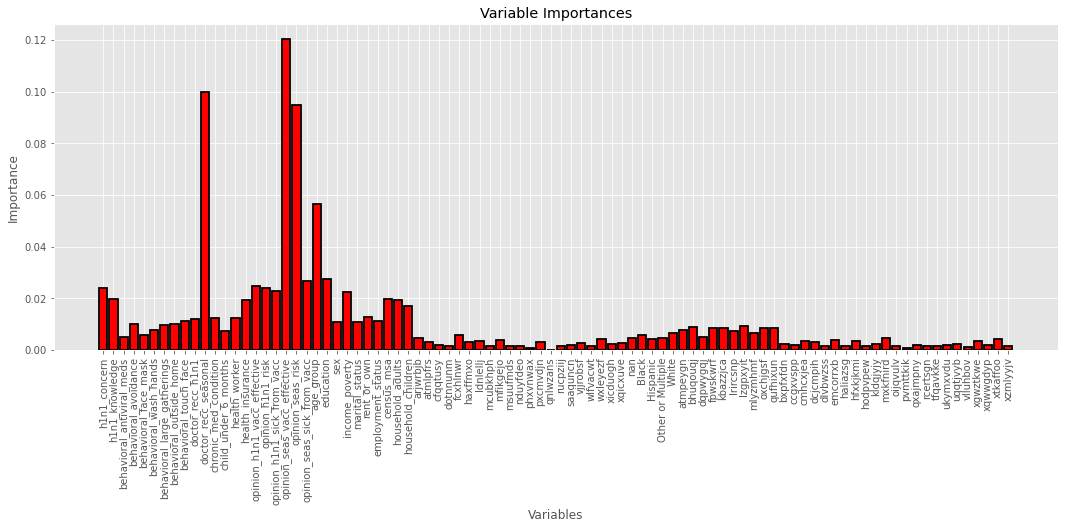

In [36]:
ImportancesGraph(seasonal_regressor)

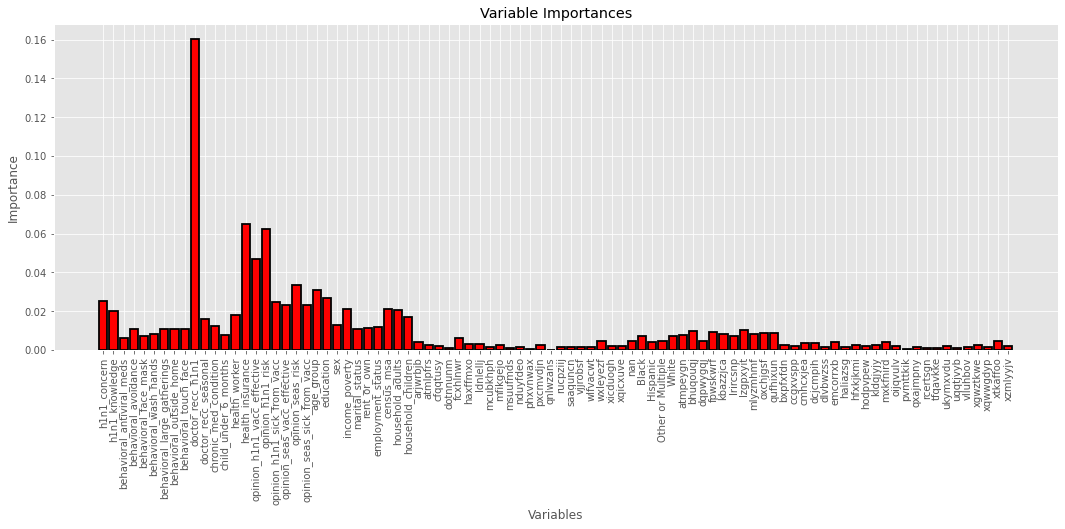

In [37]:
ImportancesGraph(h1n1_regressor)

**Prep Data for Test**

In [38]:
test_set = test_set_features

In [39]:
test_set['age_group'] = test_set['age_group'].replace('18 - 34 Years',1).replace('35 - 44 Years',2)\
                                 .replace('45 - 54 Years',3).replace('55 - 64 Years',4).replace('65+ Years',5)
test_set['education'] = test_set['education'].replace('< 12 Years',1).replace('12 Years',2)\
                                  .replace('College Graduate',4).replace('Some College',3)
test_set['sex'] = test_set['sex'].replace('Male',0).replace('Female',1)
test_set['income_poverty'] = test_set['income_poverty'].replace('Below Poverty',1).replace\
                                        ('<= $75,000, Above Poverty',2).replace('> $75,000',3)
test_set['marital_status'] = test_set['marital_status'].replace('Not Married',0).replace('Married',1)
test_set['employment_status'] = test_set['employment_status'].replace('Not in Labor Force',0).\
                                           replace('Unemployed',1).replace('Employed',2)
test_set['census_msa'] = test_set['census_msa'].replace('Non-MSA',0).replace('MSA, Not Principle  City'\
                                   ,1).replace('MSA, Principle City',2)
test_set['rent_or_own'] = test_set['rent_or_own'].replace('Rent',0).replace('Own',1)

OneHotEncoding(test_set, 'employment_industry')
OneHotEncoding(test_set, 'race')
OneHotEncoding(test_set, 'hhs_geo_region')
OneHotEncoding(test_set, 'employment_occupation')

#test_set = test_set.drop(['health_insurance'], axis=1)

In [40]:
test_set = test_set.drop(['employment_industry'], axis = 1)
test_set = test_set.drop(['race'], axis = 1)
test_set = test_set.drop(['hhs_geo_region'], axis = 1)
test_set = test_set.drop(['employment_occupation'], axis = 1)
test_set = test_set.drop(['respondent_id'],axis=1)

In [41]:
print(test_set.columns.get_loc( 'xqicxuve'))
print(test_set.columns.get_loc( 'Black'))

51
53


In [42]:
def ReplaceNullWithMean(DataFrame,x):
    i=0
    while (i<len(x)):
        DataFrame[x[i]] = DataFrame[x[i]].replace(np.NaN, DataFrame[x[i]].mean())
        i= i+1

In [43]:
null2 = test_set[test_set.columns[test_set.isnull().any()]]

In [44]:
null2

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,5.0,1.0,1.0,4.0,3.0,0.0,0.0,2.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,5.0,4.0,4.0,4.0,3.0,1.0,1.0,2.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,4.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,4.0,4.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,4.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,5.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,1.0,3.0
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.0,3.0,2.0,3.0,2.0,1.0,1.0,0.0,1.0,0.0


In [45]:
ReplaceNullWithMean(test_set, null2.columns)

In [46]:
null2 = test_set[test_set.columns[test_set.isnull().any()]]

In [47]:
null2.columns

Index([], dtype='object')

In [48]:
#test_set=test_set.drop(test_set.columns[52], axis=1)

In [49]:
test_set.shape

(26708, 90)

In [50]:
test_h1n1 = h1n1_regressor.predict(test_set)
test_seasonal = seasonal_regressor.predict(test_set)

C:\Users\Isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [51]:
test_h1n1

array([0.086, 0.005, 0.248, ..., 0.146, 0.029, 0.724])

In [52]:
test_seasonal

array([0.28 , 0.179, 0.885, ..., 0.161, 0.47 , 0.726])

In [53]:
submission = test_set_features['respondent_id']

In [54]:
submission = pd.DataFrame().assign(respondent_id=test_set_features['respondent_id'], h1n1_vaccine=test_h1n1, seasonal_vaccine=test_seasonal )

In [55]:
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.086,0.280
1,26708,0.005,0.179
2,26709,0.248,0.885
3,26710,0.661,0.981
4,26711,0.256,0.604
...,...,...,...
26703,53410,0.285,0.400
26704,53411,0.224,0.423
26705,53412,0.146,0.161
26706,53413,0.029,0.470


In [56]:
submission.to_csv(r'C:\Users\Isabe\submission2.csv', index=False)

In [57]:
#%history -g -f Flu_Predictor

***Accuracy: 0.8455 ***
***Rank: 769/5140***